#### Data set: https://www.kaggle.com/uciml/mushroom-classification
#### Name: Beverly Hom, 820921134
#### CS 596: Machine Learning
#### Fall 2017

## Supervised Classification 

Use the Python 3 Kernel

#### Algorithm 1: K-Nearest Neighbor
- Element classified by a majority vote of its nearest neighbors 
- Output is class membership 

In [4]:
# Import libraries
import os
import pandas as pd # data frames
import numpy as np # numerical matrices
import matplotlib # plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn # machine learning 
import seaborn as sns # plotting
import pylab as pl

sns.set(color_codes = True)


In [5]:
# Set plotting parameters 

sns.set_context('paper')
sns.set(style='whitegrid', rc={'grid.linestyle':':', 'axes.titlesize':16, 
                               'axes.labelsize':16, 'xtick.labelsize':16,
                            'ytick.labelsize':14, 'figure.figsize':(8,6), 
                              'legend.fontsize':12})

In [6]:
#Load in csv file

#file = "/Users/beverly/mushroom_classification/mushrooms.csv"
file = "mushrooms.csv"

# Read in csv files as pandas dataframes 
df = pd.read_csv(file)
#print(type(df))

In [7]:
# Get matrix dimensions
print("Data dimensions: {}".format(df.shape))

Data dimensions: (8124, 23)


## View Raw Categorical Data 

In [8]:
print("Data description:")

df.describe()

Data description:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
# Look at the first 5 rows 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
# Convert dataframe to matrix
data_matrix = df.values

#print(type(matrix))

In [11]:
# Counts of features 
#df.apply(pd.value_counts)

## Convert Categorical Data to Numerical Data

In [12]:
# Use label encoder to convert categorical labels to numerical labels

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
transformed_matrix = df.apply(label_encoder.fit_transform)

# View transformed matrix 
#df.apply(label_encoder.fit_transform)

## Dichotimize Classes by "Class" Column

In [13]:
# Dichotimize classes 
# e = ediible = class 0 
# p = poisonous = class 1

# Class 0: Edible class of mushrooms 
class0 = transformed_matrix.loc[transformed_matrix['class'] == 0]

# View class0 matrix 
class0.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3


In [14]:
# Class 1: Poisonous class of mushrooms
class1 = transformed_matrix.loc[transformed_matrix['class'] == 1]

# View class1 matrix 
class1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
13,1,5,3,8,1,6,1,0,1,4,...,2,7,7,0,2,1,4,3,4,5
17,1,5,2,4,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,1


## Distribution of "Edible" Class (Class 0)

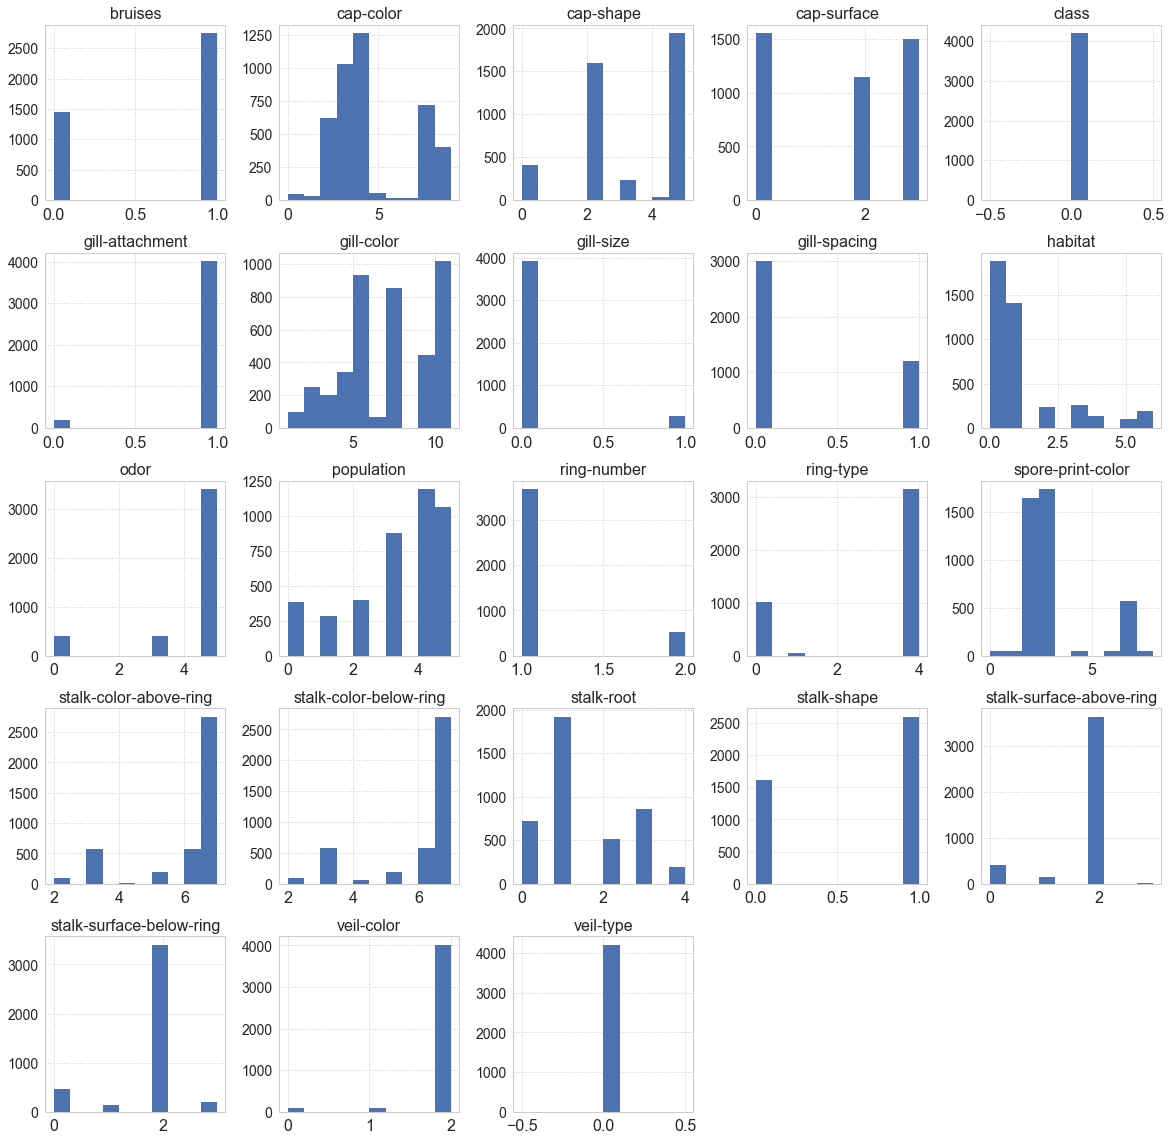

In [16]:
# Distrubtion of edible class
# Try plotting in matplotlib
fig_size = plt.rcParams["figure.figsize"]
# New figure size
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

class0.hist()
plt.show()


## Distribution of "Poisonous Class (Class 1)

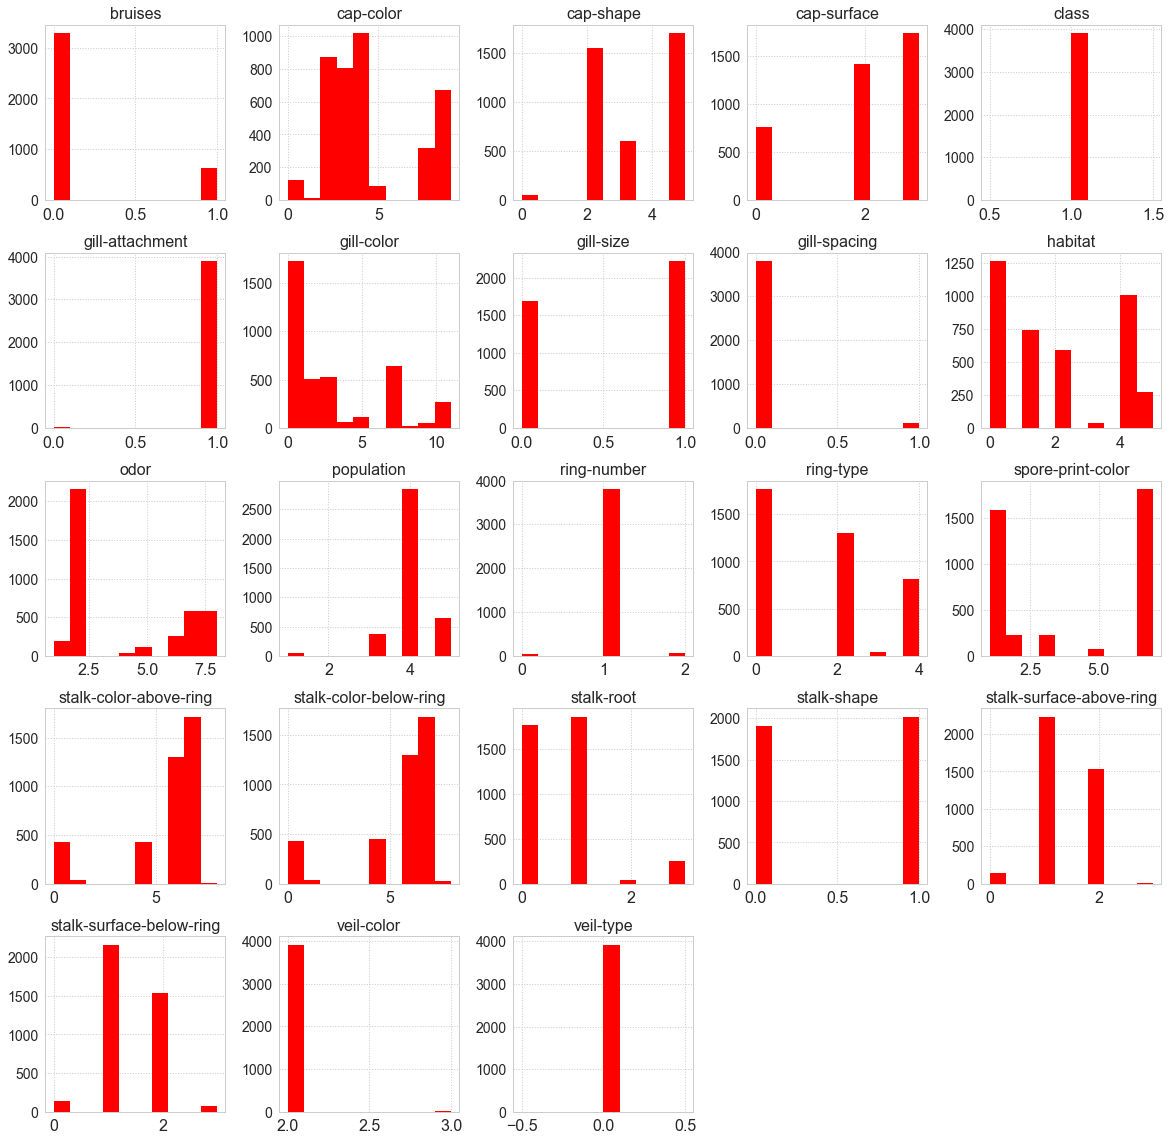

In [17]:
# Distribution of poisonous class 
class1.hist(color = "red")
plt.show()

## Heatmap: Correlation Matrix of Features

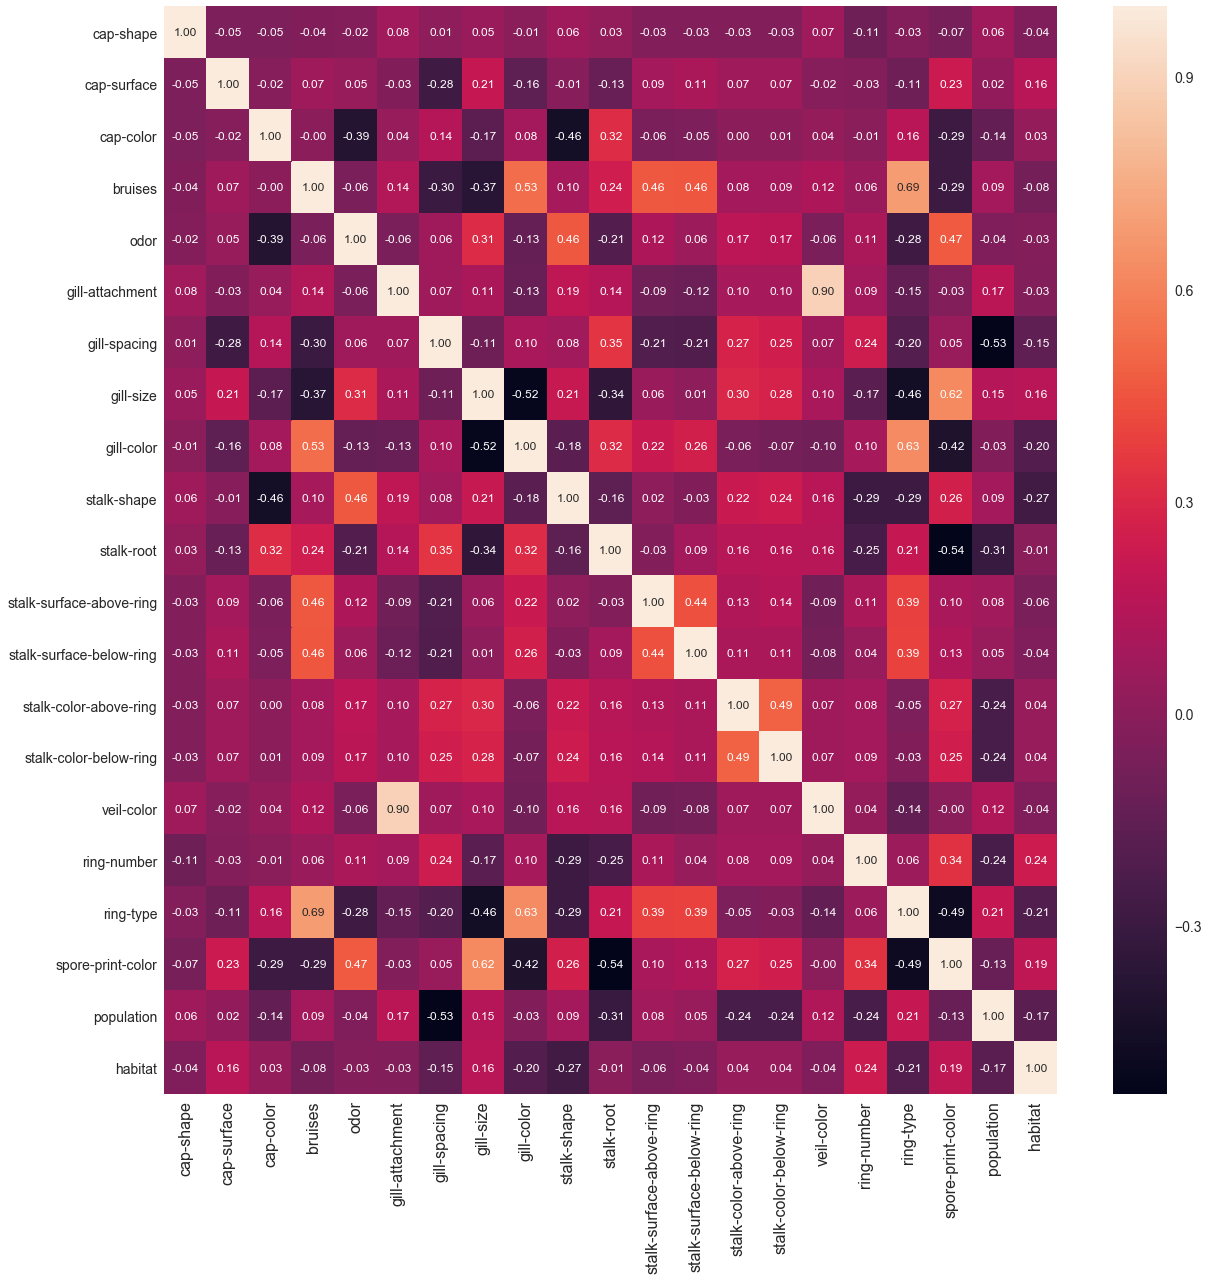

In [18]:
# Plot correlation matrix as heatmap

# Remove the "veil-type"column
t_matrix = transformed_matrix.drop("veil-type", axis = 1) 
t_matrix = t_matrix.drop("class", axis = 1)
sns.heatmap(t_matrix.corr(), annot = True, fmt = "0.2f")

# New figure size
fig_size[0] = 50
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

plt.show()
# Double click on image to make larger

In [19]:
# Rename matrix variables for splitting into training and testing sets

X = transformed_matrix.drop("class", axis = 1)
y = transformed_matrix["class"]


## Split Data into 70% Training, 30% Testing

In [20]:
# Split data into training and testing set 
from sklearn.model_selection import train_test_split

# Split into 70% training and 30% testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40)

print("Training set matrix dimensions: {}".format(X_train.shape))
print("Training set label  dimensions: {}".format(y_train.shape))
print("\n")
print("Testing set matrix dimensions: {}".format(X_test.shape))
print("Testing set label dimensions: {}".format(y_test.shape))

Training set matrix dimensions: (5686, 22)
Training set label  dimensions: (5686,)


Testing set matrix dimensions: (2438, 22)
Testing set label dimensions: (2438,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_validate

# Testing Algorithm: K-Nearest Neighbors 

# Model 1:  metric = euclidean, weight = distance

In [25]:



# Test many k values 
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 31]
print("Number of k values: {}".format(len(k_values)))

# Create en empty list to store all data
models = []
test_predictions = []
train_predictions = []
confusion_matrices = []
class_reports = []
acc_scores = []
acc_trainscores = []

error_scores = []
error_scores = []
cv_train_scores = []
cv_train_means = []
cv_train_acc = []
cv_test_scores = []
cv_test_means = []
cv_test_acc = []

   
for k in k_values:
    model = KNeighborsClassifier(n_neighbors = k, metric = "euclidean", weights = "distance")
    models.append(model)
print("KNN Models:")
for model in models:
    print(model)

# Fit the model- learn from training set 
for model in models:
    model.fit(X_train, y_train)
    
# Predict responses on the testing set 
for model in models:
    test_pred = model.predict(X_test)
    test_predictions.append(test_pred)
    
# Predict responses on the training set 
for model in models:
    train_pred = model.predict(X_train)
    train_predictions.append(train_pred)

print("\n")
print("Confusion Matrices:")

# Create confusion matrices for each model 
for test_pred in test_predictions:
    c_matrix = confusion_matrix(y_test, test_pred)
    confusion_matrices.append(c_matrix)
for c_matrix in confusion_matrices:
    print(c_matrix)

print("\n")
print("Classification Reports:")
    
# Create a classificaiton report for each model 
targets = ["Edible", "Poisonous"]
for test_pred in test_predictions: 
    report = classification_report(y_test, test_pred, target_names = targets)
    class_reports.append(report)
for report in class_reports:
    print(report)
    
print("\n")
print("Testing Accuracy Scores:")

# Compute the testing accuracy for each model 
for test_pred in test_predictions:
    acc = accuracy_score(y_test, test_pred)
    acc_scores.append(acc*100)
for acc in acc_scores:
    print(acc)
    
print("\n")
print("Training Accuracy Scores:")

# Compute the training accuracy for each model 
for train_pred in train_predictions:
    acc = accuracy_score(y_train, train_pred)
    acc_trainscores.append(acc*100)
for acc in acc_trainscores:
    print(acc)
    
    
    
    
    
print("\n")
print("Error Scores:")
    
    
# Compute the testing error for each model 
for acc in acc_scores:
    error = (100 - acc)
    error_scores.append(error)
for error in error_scores:
    print(error)
    

    
# Compute the training accuracy for each model 
#for train_pred in train_predictions:
#    train_acc = accuracy_score(y_train, train_pred)
#    train_acc_scores.append(train_acc)
    

    
# Perform 10-fold CV to get training and testing scores
for model in models:
    cv_results = cross_validate(model, X, y, cv = 10, return_train_score = True)
    train_score = cv_results["train_score"]
    cv_train_scores.append(train_score)
    test_score = cv_results["test_score"]
    cv_test_scores.append(test_score)
    
print("\n")
print("10-fold CV train scores:")
    
for train_score in cv_train_scores:
    print(train_score)
    
print("\n")
print("10-fold CV test score:")
for test_score in cv_test_scores:
    print(test_score)
    

#print("\n")
#print("10-fold training averages")
# Get means and standard dev from 10-fold CVs
for train_score in cv_train_scores:
    mean = train_score.mean()
    cv_train_means.append(mean)
#for mean in cv_train_means:
#    print(mean)
    
    
print("\n") 
print("10-fold testing averages")

for test_score in cv_test_scores:
    mean = test_score.mean()
    cv_test_means.append(mean*100)
for mean in cv_test_means:
    print(mean)



Number of k values: 14
KNN Models:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
     

#  Plots

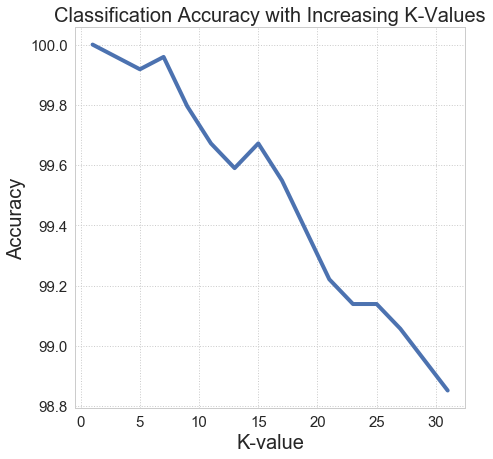

In [27]:
# Make figure sizes larger

# New figure size
fig_size[0] = 7
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

plt.plot(k_values, acc_scores, linewidth = 4.0)

plt.title("Classification Accuracy with Increasing K-Values", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.xlabel("K-value", fontsize = 20)
plt.tick_params(axis = "both", which = "major", labelsize = 15)

#plt.legend()
plt.show()


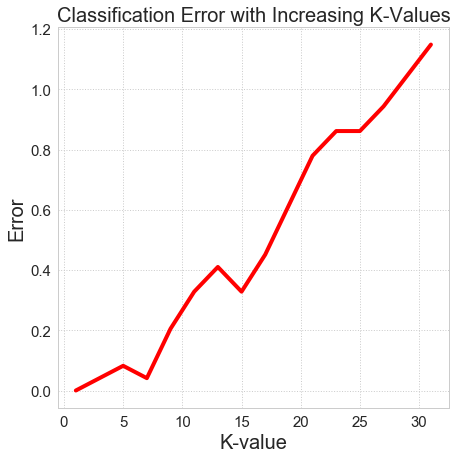

In [28]:
# Make figure sizes larger

#lines = plt.plot(acc_scores, train_acc_scores)

# Get current figure size 
fig_size = plt.rcParams["figure.figsize"] 
# print("Current size: {}".format(fig_size)) 

# New figure size
fig_size[0] = 7
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

plt.title("Classification Error with Increasing K-Values", fontsize = 20)
plt.ylabel("Error", fontsize = 20)
plt.xlabel("K-value", fontsize = 20)
plt.tick_params(axis = "both", which = "major", labelsize = 15)
plt.plot(k_values, error_scores, linewidth = 4.0, color = "red")


#plt.legend()
plt.show()


In [29]:
cv_test_means 

num_models = list(range(1,15))


In [30]:
# Set plotting parameters for seaborn 

sns.set_context('paper')
sns.set(style='whitegrid', rc={'grid.linestyle':':', 'axes.titlesize':16, 
                               'axes.labelsize':16, 'xtick.labelsize':16,
                               'ytick.labelsize':14, 'figure.figsize':(8,6), 
                               'legend.fontsize':12})

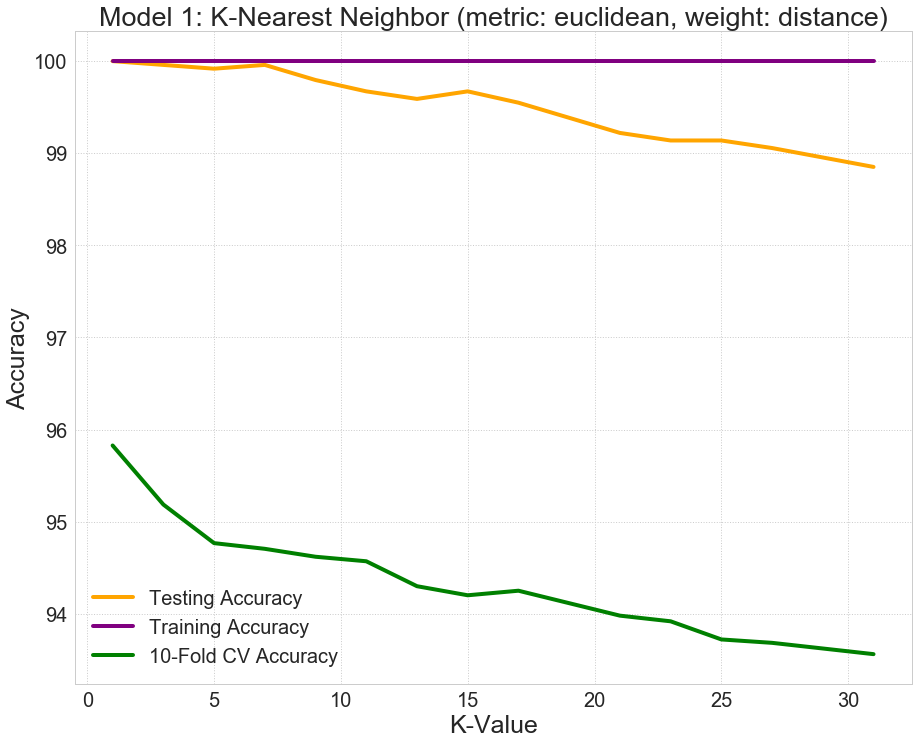

In [31]:

# New figure size
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

# For x-axis values 
cv_axis = list(range(1,11))

# Lines to plot
plt.plot(k_values, acc_scores, color = "orange", linewidth = 4.0, label = "Testing Accuracy")
plt.plot(k_values, acc_trainscores, color = "purple", linewidth = 4.0, label = "Training Accuracy")
plt.plot(k_values, cv_test_means, color = "green", linewidth = 4.0, label = "10-Fold CV Accuracy")

# Plotting settings 
plt.title("Model 1: K-Nearest Neighbor (metric: euclidean, weight: distance)", fontsize = 27)
plt.ylabel("Accuracy", fontsize = 25)
plt.xlabel("K-Value", fontsize = 25)
plt.tick_params(axis = "both", which = "major", labelsize = 20)

#ax.legend(handles, labels)
plt.legend(fontsize = 20)
plt.show()


# Model 2: KNN (metric = minkowski, weight = uniform)

In [32]:
# Test many k values 
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 31]
print("Number of k values: {}".format(len(k_values)))

# Create en empty list to store all data
models = []
test_predictions = []
train_predictions = []
confusion_matrices = []
class_reports = []
acc_scores = []
acc_trainscores = []
error_scores = []
error_scores = []
cv_train_scores = []
cv_train_means = []
cv_train_acc = []
cv_test_scores = []
cv_test_means = []
cv_test_acc = []

   
for k in k_values:
    model = KNeighborsClassifier(n_neighbors = k, metric = "minkowski", weights = "uniform")
    models.append(model)
print("KNN Models:")
for model in models:
    print(model)

# Fit the model- learn from training set 
for model in models:
    model.fit(X_train, y_train)
    
# Predict responses on the testing set 
for model in models:
    test_pred = model.predict(X_test)
    test_predictions.append(test_pred)
    
# Predict responses on the training set 
for model in models:
    train_pred = model.predict(X_train)
    train_predictions.append(train_pred)

print("\n")
print("Confusion Matrices:")

# Create confusion matrices for each model 
for test_pred in test_predictions:
    c_matrix = confusion_matrix(y_test, test_pred)
    confusion_matrices.append(c_matrix)
for c_matrix in confusion_matrices:
    print(c_matrix)

print("\n")
print("Classification Reports:")
    
# Create a classificaiton report for each model 
targets = ["Edible", "Poisonous"]
for test_pred in test_predictions: 
    report = classification_report(y_test, test_pred, target_names = targets)
    class_reports.append(report)
for report in class_reports:
    print(report)
    
print("\n")
print("Testing Accuracy Scores:")

# Compute the testing accuracy for each model 
for test_pred in test_predictions:
    acc = accuracy_score(y_test, test_pred)
    acc_scores.append(acc*100)
for acc in acc_scores:
    print(acc)
    
print("\n")
print("Training Accuracy Scores:")

for train_pred in train_predictions:
    acc = accuracy_score(y_train, train_pred)
    acc_trainscores.append(acc*100)
for acc in acc_trainscores:
    print(acc)
    
    
    
    
    
print("\n")
print("Error Scores:")
    
    
# Compute the testing error for each model 
for acc in acc_scores:
    error = (100 - acc)
    error_scores.append(error)
for error in error_scores:
    print(error)
    



    
# Perform 10-fold CV to get training and testing scores
for model in models:
    cv_results = cross_validate(model, X, y, cv = 10, return_train_score = True)
    train_score = cv_results["train_score"]
    cv_train_scores.append(train_score)
    test_score = cv_results["test_score"]
    cv_test_scores.append(test_score)
    
print("\n")
print("10-fold CV train scores:")
    
for train_score in cv_train_scores:
    print(train_score)
    
print("\n")
print("10-fold CV test score:")
for test_score in cv_test_scores:
    print(test_score)
    

#print("\n")
#print("10-fold training averages")
# Get means and standard dev from 10-fold CVs
for train_score in cv_train_scores:
    mean = train_score.mean()
    cv_train_means.append(mean)
#for mean in cv_train_means:
#    print(mean)
    
    
print("\n") 
print("10-fold testing averages")

for test_score in cv_test_scores:
    mean = test_score.mean()
    cv_test_means.append(mean*100)
for mean in cv_test_means:
    print(mean)



Number of k values: 14
KNN Models:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
          

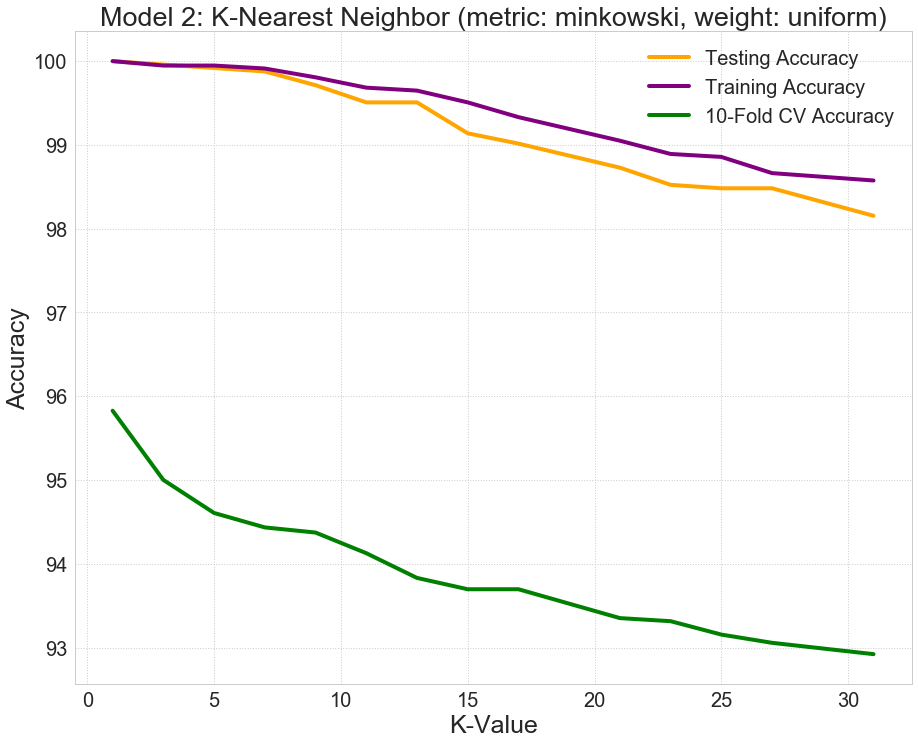

In [33]:
# New figure size
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size


# For x-axis values 
cv_axis = list(range(1,11))

# Lines to plot
plt.plot(k_values, acc_scores, color = "orange", linewidth = 4.0, label = "Testing Accuracy")
plt.plot(k_values, acc_trainscores, color = "purple", linewidth = 4.0, label = "Training Accuracy")
plt.plot(k_values, cv_test_means, color = "green", linewidth = 4.0, label = "10-Fold CV Accuracy")

# Plotting settings 
plt.title("Model 2: K-Nearest Neighbor (metric: minkowski, weight: uniform)", fontsize = 27)
plt.ylabel("Accuracy", fontsize = 25)
plt.xlabel("K-Value", fontsize = 25)
plt.tick_params(axis = "both", which = "major", labelsize = 20)

# Legend 
#purple_patch = mpatches.Patch(Color = "purple", label = "Testing")
#orange_patch = mpatches.Patch(Color = "orange", label = "Training")
#green_patch = mpatches.Patch(Color = "green", label = "Validation")
#plt.legend(handles = [orange_patch, purple_patch, green_patch])
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
plt.legend(fontsize = 20)
plt.show()


# Model 3: KNN  (metric = manhattan  , weight = distance)

In [90]:
# Test many k values 
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 31]
print("Number of k values: {}".format(len(k_values)))

# Create en empty list to store all data
models = []
test_predictions = []
train_predictions = []
confusion_matrices = []
class_reports = []
acc_scores = []
acc_trainscores = []
error_scores = []
error_scores = []
cv_train_scores = []
cv_train_means = []
cv_train_acc = []
cv_test_scores = []
cv_test_means = []
cv_test_acc = []

   
for k in k_values:
    model = KNeighborsClassifier(n_neighbors = k, metric = "manhattan", weights = "distance")
    models.append(model)
print("KNN Models:")
for model in models:
    print(model)

# Fit the model- learn from training set 
for model in models:
    model.fit(X_train, y_train)
    
# Predict responses on the testing set 
for model in models:
    test_pred = model.predict(X_test)
    test_predictions.append(test_pred)
    
# Predict responses on the training set 
for model in models:
    train_pred = model.predict(X_train)
    train_predictions.append(train_pred)

print("\n")
print("Confusion Matrices:")

# Create confusion matrices for each model 
for test_pred in test_predictions:
    c_matrix = confusion_matrix(y_test, test_pred)
    confusion_matrices.append(c_matrix)
for c_matrix in confusion_matrices:
    print(c_matrix)

print("\n")
print("Classification Reports:")
    
# Create a classificaiton report for each model 
targets = ["Edible", "Poisonous"]
for test_pred in test_predictions: 
    report = classification_report(y_test, test_pred, target_names = targets)
    class_reports.append(report)
for report in class_reports:
    print(report)
    
print("\n")
print("Testing Accuracy Scores:")

# Compute the testing accuracy for each model 
for test_pred in test_predictions:
    acc = accuracy_score(y_test, test_pred)
    acc_scores.append(acc*100)
for acc in acc_scores:
    print(acc)
    
print("\n")
print("Training Accuracy Scores:")

for train_pred in train_predictions:
    acc = accuracy_score(y_train, train_pred)
    acc_trainscores.append(acc*100)
for acc in acc_trainscores:
    print(acc)
    
    
    
    
    
print("\n")
print("Error Scores:")
    
    
# Compute the testing error for each model 
for acc in acc_scores:
    error = (100 - acc)
    error_scores.append(error)
for error in error_scores:
    print(error)
    

    
    
# Perform 10-fold CV to get training and testing scores
for model in models:
    cv_results = cross_validate(model, X, y, cv = 10, return_train_score = True)
    train_score = cv_results["train_score"]
    cv_train_scores.append(train_score)
    test_score = cv_results["test_score"]
    cv_test_scores.append(test_score)
    
print("\n")
print("10-fold CV train scores:")
    
for train_score in cv_train_scores:
    print(train_score)
    
print("\n")
print("10-fold CV test score:")
for test_score in cv_test_scores:
    print(test_score)
    

#print("\n")
#print("10-fold training averages")
# Get means and standard dev from 10-fold CVs
for train_score in cv_train_scores:
    mean = train_score.mean()
    cv_train_means.append(mean)
#for mean in cv_train_means:
#    print(mean)
    
    
print("\n") 
print("10-fold testing averages")

for test_score in cv_test_scores:
    mean = test_score.mean()
    cv_test_means.append(mean*100)
for mean in cv_test_means:
    print(mean)


Number of k values: 14
KNN Models:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
     

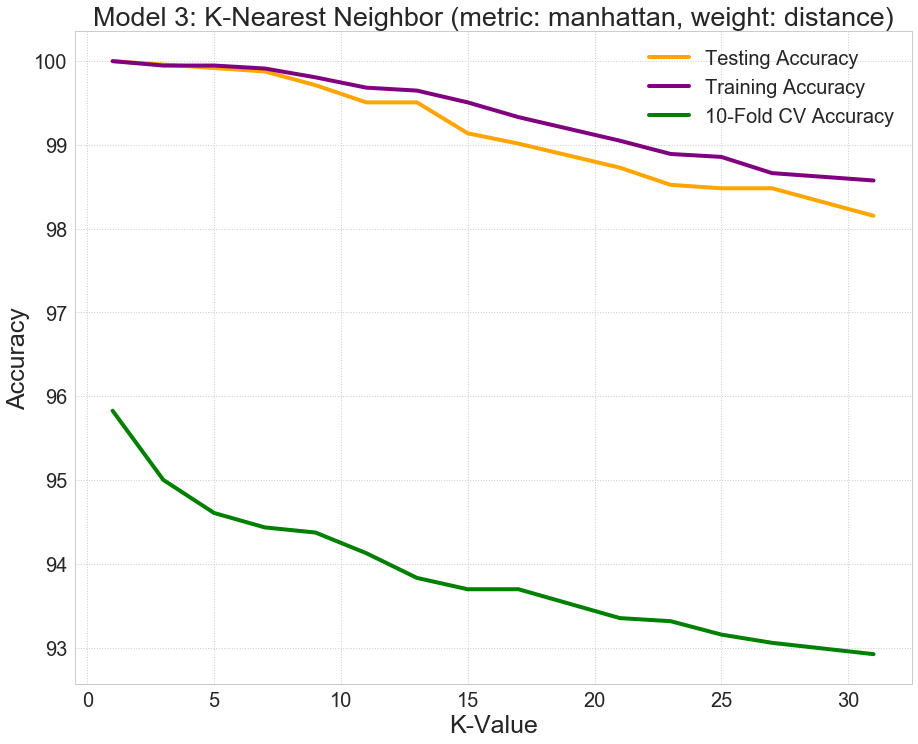

In [35]:
# New figure size
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size


# For x-axis values 
cv_axis = list(range(1,11))

# Lines to plot
plt.plot(k_values, acc_scores, color = "orange", linewidth = 4.0, label = "Testing Accuracy")
plt.plot(k_values, acc_trainscores, color = "purple", linewidth = 4.0, label = "Training Accuracy")
plt.plot(k_values, cv_test_means, color = "green", linewidth = 4.0, label = "10-Fold CV Accuracy")

# Plotting settings 
plt.title("Model 3: K-Nearest Neighbor (metric: manhattan, weight: distance)", fontsize = 27)
plt.ylabel("Accuracy", fontsize = 25)
plt.xlabel("K-Value", fontsize = 25)
plt.tick_params(axis = "both", which = "major", labelsize = 20)

# Legend 
#purple_patch = mpatches.Patch(Color = "purple", label = "Testing")
#orange_patch = mpatches.Patch(Color = "orange", label = "Training")
#green_patch = mpatches.Patch(Color = "green", label = "Validation")
#plt.legend(handles = [orange_patch, purple_patch, green_patch])
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
plt.legend(fontsize = 20)
plt.show()


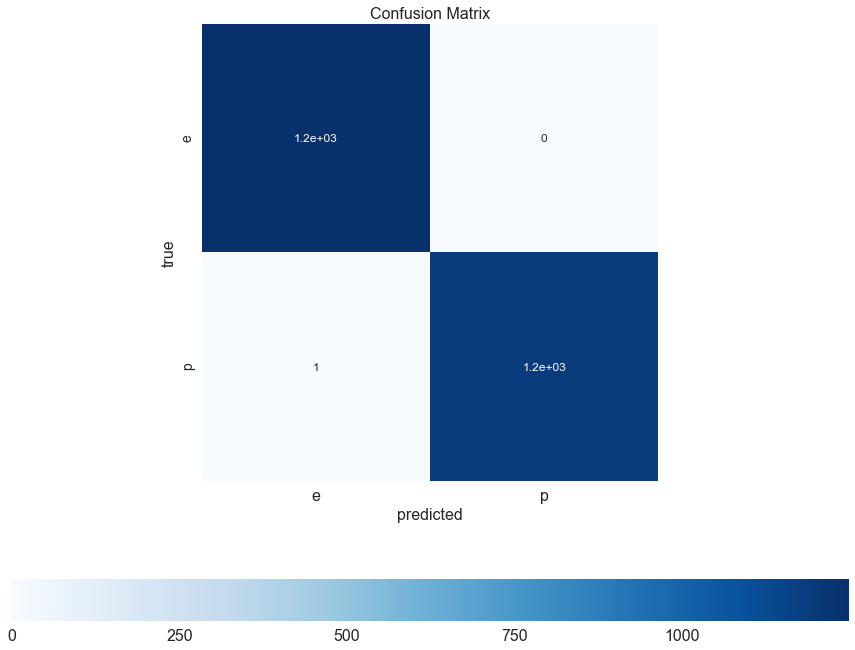

In [37]:
confusion_plot = sns.heatmap(confusion_matrices[1], 
                             square = True, 
                             xticklabels = ['e', 'p'], 
                             annot = True, 
                             annot_kws = {'fontsize': 12}, 
                             yticklabels = ['e', 'p'], 
                             cbar = True, 
                             cbar_kws = {"orientation": "horizontal"}, 
                             cmap = "Blues").set(xlabel = "predicted", 
                             ylabel = "true", 
                             title = 'Confusion Matrix')

plt.show()